**Nama : Arsmanda Adi Nugraha**

**NIM : 5312422026**

**Prodi : Teknik Komputer**

In [2]:
# install modul scikit-dsp-comm
!pip install scikit-dsp-comm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 1.4 MB/s eta 0:00:00


In [3]:
# Memuat modul-modul yang diperlukan dan menampilkan plot secara langsung di notebook
%pylab inline

# Mengimpor modul-modul yang diperlukan dari sk_dsp_comm package
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh

# Mengimpor modul scipy.signal sebagai signal
import scipy.signal as signal

# Mengimpor fungsi Audio dan display dari IPython.display
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


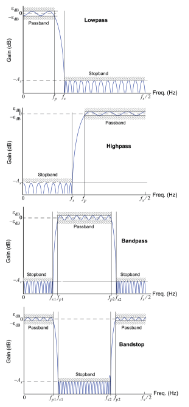

Gambar tersebut menunjukkan respons frekuensi dari empat jenis filter: lowpass, highpass, bandpass, dan bandstop. Diagram pertama adalah filter lowpass, yang memungkinkan frekuensi rendah melewati (passband) dan menghalangi frekuensi tinggi (stopband). Diagram kedua adalah filter highpass, yang memungkinkan frekuensi tinggi melewati dan menghalangi frekuensi rendah. Diagram ketiga adalah filter bandpass, yang memungkinkan rentang frekuensi tertentu untuk melewati (passband) dan menghalangi frekuensi di luar rentang tersebut (stopbands pada kedua sisi passband). Diagram keempat adalah filter bandstop, yang menghalangi rentang frekuensi tertentu (stopband) dan memungkinkan frekuensi di luar rentang tersebut untuk melewati (passbands di kedua sisi stopband). Pada setiap diagram, sumbu horizontal merepresentasikan frekuensi (Hz) dan sumbu vertikal merepresentasikan gain (dB). Garis biru menunjukkan bagaimana gain berubah seiring dengan perubahan frekuensi.


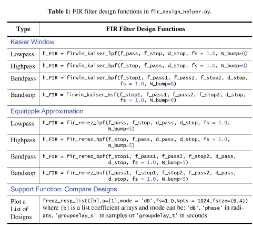

Gambar yang ditunjukkan adalah tabel yang merangkum beberapa fungsi desain filter FIR (Finite Impulse Response) di file fir_design_helper.py. Tabel ini mencakup tiga kategori utama desain filter: Kaiser Window, Equiripple Approximation, dan Support Function, dengan rincian setiap kategori sebagai berikut:

**Kaiser Window**
* Lowpass
  lpf = firwin_kaiser_lp(f_stop, f_pass, fs=1.0, n_taps=20)
* Highpass
hpf = firwin_kaiser_hp(f_stop, f_pass, fs=1.0, n_taps=20)
* Bandpass
bpf = firwin_kaiser_bp(f_stop1, f_pass1, f_pass2, f_stop2, fs=1.0, n_taps=20)
* Bandstop
bsf = firwin_kaiser_bs(f_stop1, f_pass1, f_pass2, f_stop2, fs=1.0, n_taps=20)
* Equiripple Approximation
Lowpass
lpf = fir_remez_lpf(f_stop, f_pass, fs=1.0, N=132, K_pass=1, K_stop=60)
* Highpass
hpf = fir_remez_hpf(f_stop, f_pass, fs=1.0, N = 132, K_pass=1, K_stop=60)
* Bandpass
bpf = fir_remez_bpf(f_stop1, f_pass1, f_pass2, f_stop2, fs = 1.0, N = 132, K_pass=1, K_stop=60)
* Bandstop
bsf = fir_remez_bsf(f_stop1, f_pass1, f_pass2, f_stop2, fs=1.0, n_taps=20)
* Support Function: Compare Designs
Compare Designs
compare_designs(f_pass, f_stop, fs=1.0)

Tabel ini berguna sebagai referensi untuk memilih dan mengimplementasikan jenis filter FIR yang tepat menggunakan koding yang sudah disediakan dalam file fir_design_helper.py.

In [4]:
# Mendesain filter FIR dengan metode Kaiser menggunakan fungsi firwin_kaiser_lpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (50), dan beta (1.0)
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)

# Mendesain filter FIR dengan metode Remez menggunakan fungsi fir_remez_lpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (0.2), jumlah taps (50), dan beta (1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

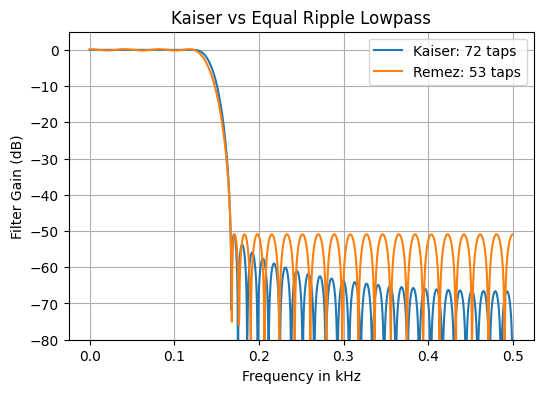

In [5]:
# Menghitung respons frekuensi dari kedua filter FIR yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k dan b_r),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=1 karena normalized frequency).
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Lowpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter
legend((r'Kaiser: %d taps' % len(b_k), r'Remez: %d taps' % len(b_r)), loc='best')

# Menampilkan grid pada plot
grid()


Gambar ini menggambarkan analisis perbandingan dari dua filter lowpass: Kaiser window dan metode Parks-McClellan (Remez). Berikut adalah rincian lengkap dari konten gambar:

1. **Judul:** "Kaiser vs Equal Ripple Lowpass"
2. **Sumbu:**
   - Sumbu x mewakili frekuensi dalam kHz.
   - Sumbu y mewakili gain filter dalam dB.
3. **Detail Plot:**
   - Grafik membandingkan dua jenis filter lowpass yang berbeda.
   - **Garis Biru:** Mewakili filter lowpass Kaiser window dengan 72 taps.
   - **Garis Orange:** Mewakili filter lowpass Equal Ripple (Remez) dengan 53 taps.
4. **Legenda:**
   - "Kaiser: 72 taps" menunjukkan garis biru.
   - "Remez: 53 taps" menunjukkan garis orange.

Grafik tersebut menunjukkan respon frekuensi dari kedua filter. Filter Kaiser window (biru) memiliki pita transisi yang lebih halus dan gelombang yang kurang mencolok dibandingkan dengan filter Remez (orange), yang memiliki gelombang yang lebih tajam di stop band.

Secara keseluruhan, gambar tersebut mengilustrasikan perbedaan kinerja antara dua metode desain filter dalam hal gain filter di berbagai frekuensi.


In [6]:
# Mendesain filter FIR high-pass dengan metode Kaiser menggunakan fungsi firwin_kaiser_hpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (50), dan beta (1.0)
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)

# Mendesain filter FIR high-pass dengan metode Remez menggunakan fungsi fir_remez_hpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (0.2), jumlah taps (50), dan beta (1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

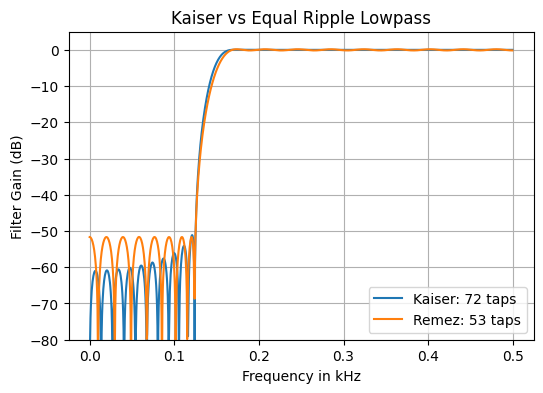

In [7]:
# Menghitung respons frekuensi dari kedua filter FIR high-pass yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k_hp dan b_r_hp),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=1 karena normalized frequency).
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Lowpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter
legend((r'Kaiser: %d taps' % len(b_k_hp), r'Remez: %d taps' % len(b_r_hp)), loc='best')

# Menampilkan grid pada plot
grid()


Gambar tersebut menunjukkan perbandingan antara dua jenis filter lowpass digital: satu didesain menggunakan jendela Kaiser (ditunjukkan dengan garis biru) dan yang lainnya menggunakan metode Equal Ripple atau Remez (ditunjukkan dengan garis oranye). Sumbu x mewakili frekuensi dalam kilohertz (kHz), sedangkan sumbu y menunjukkan gain filter dalam desibel (dB).

Filter yang menggunakan jendela Kaiser memiliki 72 taps, sementara filter Remez memiliki 53 taps. Kedua filter memiliki frekuensi cutoff yang sama, sekitar 0.1 kHz. Filter Kaiser menunjukkan respon yang lebih halus di stopband dengan sidelobes yang lebih rendah tetapi lebih banyak dibandingkan filter Remez. Sebaliknya, filter Remez memiliki sidelobes yang lebih tinggi tetapi lebih terdistribusi secara merata di stopband.

Perbandingan ini menunjukkan bahwa filter Remez dapat mencapai karakteristik filter yang diinginkan dengan jumlah taps yang lebih sedikit dibandingkan filter Kaiser, meskipun dengan trade-off pada karakteristik sidelobe. Filter Remez sering digunakan ketika desain dengan sidelobe yang lebih konsisten diperlukan, sementara filter Kaiser mungkin lebih disukai ketika pengurangan sidelobe secara keseluruhan lebih penting.

In [8]:
# Mendesain filter FIR band-pass dengan metode Kaiser menggunakan fungsi firwin_kaiser_bpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (7000 dan 8000),
# normalized band edges (14000 dan 15000), lebar band stop (50), dan frekuensi sampling (48000).
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)

# Mendesain filter FIR band-pass dengan metode Remez menggunakan fungsi fir_remez_bpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (7000 dan 8000),
# normalized band edges (14000 dan 15000), lebar band stop (0.2), jumlah taps (50), dan frekuensi sampling (48000).
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

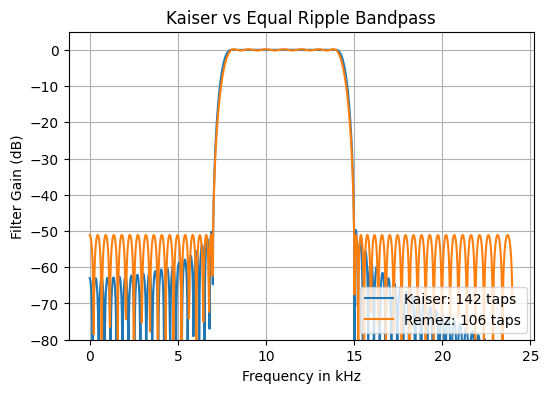

In [9]:
# Menghitung respons frekuensi dari kedua filter FIR band-pass yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k_bp dan b_r_bp),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=48 karena frekuensi sampling adalah 48 kHz).
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Bandpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter, diletakkan di pojok kanan bawah
legend((r'Kaiser: %d taps' % len(b_k_bp), r'Remez: %d taps' % len(b_r_bp)), loc='lower right')

# Menampilkan grid pada plot
grid()


Gambar tersebut menunjukkan perbandingan antara dua jenis filter bandpass digital: satu didesain menggunakan jendela Kaiser (ditunjukkan dengan garis biru) dan yang lainnya menggunakan metode Equal Ripple atau Remez (ditunjukkan dengan garis oranye). Sumbu x mewakili frekuensi dalam kilohertz (kHz), sedangkan sumbu y menunjukkan gain filter dalam desibel (dB).

Filter bandpass ini memiliki dua frekuensi cutoff, yaitu sekitar 5 kHz dan 15 kHz, di mana frekuensi antara 5 kHz dan 15 kHz diteruskan (passband), sementara frekuensi di luar rentang tersebut diredam (stopband). Filter yang menggunakan jendela Kaiser memiliki 142 taps, sedangkan filter Remez memiliki 106 taps.

Pada gambar ini, kita dapat melihat bahwa:
- **Filter Kaiser (142 taps)**: Memiliki sidelobes yang lebih rendah tetapi lebih banyak di stopband. Ini berarti filter ini lebih efektif dalam meredam frekuensi yang tidak diinginkan dengan lebih sedikit fluktuasi di stopband.
- **Filter Remez (106 taps)**: Memiliki sidelobes yang lebih tinggi tetapi lebih terdistribusi secara merata di stopband. Meskipun jumlah taps lebih sedikit, filter ini mencapai performa passband yang serupa dengan filter Kaiser, namun dengan sidelobe yang lebih konsisten dan berulang di stopband.

Perbandingan ini menunjukkan bahwa filter Remez dapat mencapai karakteristik filter yang diinginkan dengan jumlah taps yang lebih sedikit dibandingkan filter Kaiser. Filter Remez sering digunakan ketika desain dengan sidelobe yang lebih seragam diperlukan, sementara filter Kaiser mungkin lebih disukai ketika pengurangan sidelobe secara keseluruhan lebih penting. Secara keseluruhan, pilihan antara kedua filter ini bergantung pada kebutuhan spesifik aplikasi, seperti pentingnya pengurangan sidelobe versus kompleksitas filter (jumlah taps).

In [10]:
# Mendesain filter FIR low-pass menggunakan metode Remez
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (3300 dan 4300),
# normalized band edges (0.5), jumlah taps (60), dan frekuensi sampling (96000).
b_up = fir_d.fir_remez_lpf(3300,4300,0.5,60,96000)

In [11]:
# Membuat filter FIR dengan metode multirate menggunakan fungsi multirate_FIR()
# Parameter yang diberikan adalah koefisien filter FIR (b_up).
mr_up = mrh.multirate_FIR(b_up)

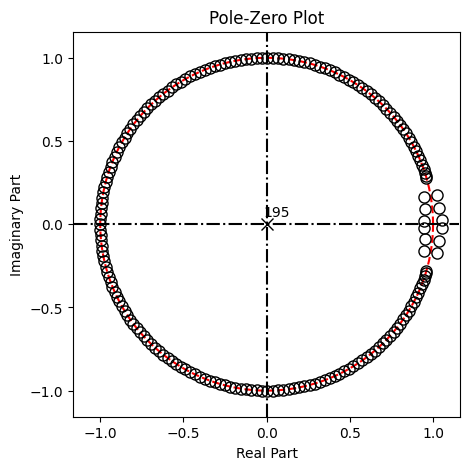

In [12]:
# Menampilkan konfigurasi pole-zero dari filter FIR dengan jumlah tap yang sangat tinggi
# (linear phase FIR) menggunakan metode zplane() dari objek multirate_FIR.
mr_up.zplane()

Gambar ini adalah plot kutub dan nol (pole-zero plot) yang sering digunakan dalam analisis sistem kontrol atau sinyal.

Berikut adalah detail-deskripsi dari gambar tersebut:
- **Sumbu X** melabeli bagian nyata (Real Part).
- **Sumbu Y** melabeli bagian imajiner (Imaginary Part).
- Terdapat lingkaran dengan titik-titik:
  - Titik-titik merah yang dikelilingi oleh lingkaran hitam mewakili "kutub" (poles).
  - Titik-titik hitam yang dikelilingi oleh lingkaran merah mewakili "nol" (zeros).
- Lingkaran unit (unit circle) dengan radius 1 ditampilkan sebagai referensi.
- Persimpangan garis putus-putus hitam di tengah lingkaran merupakan titik asal (0,0) dalam bentuk kartesian.
- Ada anotasi label "1.95" pada titik hampir di sumbu nyata (Real Part).

Plot ini memberikan representasi visual dari letak kutub dan nol dalam bidang kompleks untuk sistem atau fungsi tertentu.


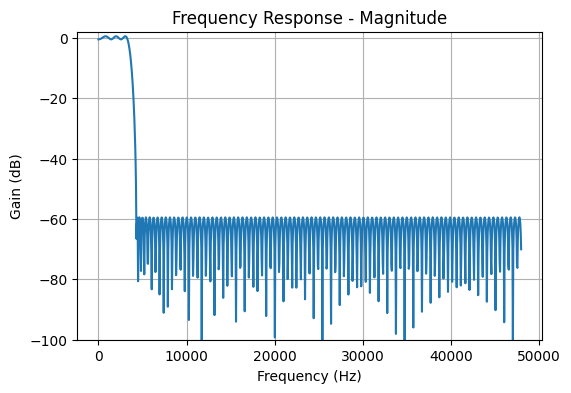

In [13]:
# Memverifikasi respons frekuensi di passband dan stopband sesuai dengan yang diharapkan
# menggunakan metode freq_resp() dari objek multirate_FIR.
# Parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (96000 Hz).
mr_up.freq_resp('db',96000)

Gambar tersebut merupakan grafik respons frekuensi - magnitudo. Grafik ini menunjukkan bagaimana gain (penguatan) dalam desibel (dB) beraksi terhadap frekuensi dalam Hz (Hertz).

- Sumbu X merepresentasikan frekuensi dalam Hz, berkisar dari 0 hingga 50.000 Hz.
- Sumbu Y merepresentasikan gain dalam dB, berkisar dari -100 dB hingga 0 dB.

Grafik tersebut memiliki ciri-ciri berikut:
1. Di frekuensi rendah (sekitar 0 hingga 5.000 Hz), gain berada pada nilai tertinggi, yaitu 0 dB.
2. Di luar frekuensi rendah tersebut, gain mengalami penurunan drastis dan berosilasi di sekitar nilai -60 dB hingga -80 dB.
3. Pola osilasi pada frekuensi yang lebih tinggi menampilkan karakteristik respons frekuensi filter atau sistem yang sedang dianalisis.

Grafik ini secara umum menunjukkan bahwa sistem atau filter memiliki gain tinggi di frekuensi rendah dan gain rendah di frekuensi tinggi, yang merupakan karakteristik dari filter low-pass.


In [14]:
# Menghitung jumlah taps dari filter FIR dengan mengurangkan 1 dari panjang koefisien filter (len(b_up)-1)
# dan kemudian membaginya dengan 2.
(len(b_up-1))/2

98.0

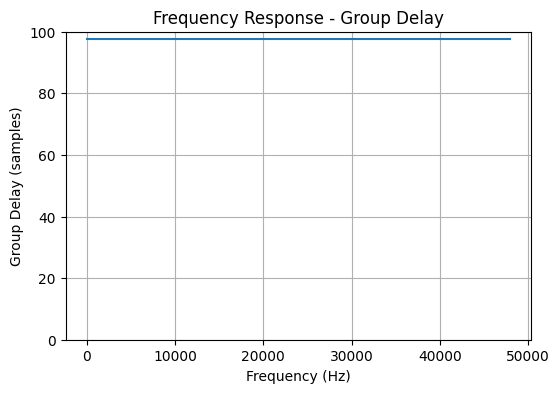

In [15]:
# Memverifikasi bahwa desain FIR memiliki group delay yang konstan dengan menghitung
# respons group delay menggunakan metode freq_resp() dari objek multirate_FIR.
# Parameter yang diberikan adalah tipe respons ('groupdelay_s'), frekuensi sampling (96000 Hz),
# dan range frekuensi [0, 100].
mr_up.freq_resp('groupdelay_s', 96000, [0, 100])

Gambar ini adalah grafik respon frekuensi yang menampilkan Delay Grup dari suatu sistem. Grafik ini berjudul "Frequency Response - Group Delay".

Pada sumbu horizontal (x) grafik, ditampilkan frekuensi dalam satuan Hertz (Hz), yang berkisar dari 0 hingga 50,000 Hz. Sementara itu, pada sumbu vertikal (y), ditampilkan Delay Grup dalam satuan sampel, berkisar dari 0 hingga 100 sampel.

Dari grafik terlihat bahwa Delay Grup memiliki nilai konstan sebesar 100 sampel untuk seluruh rentang frekuensi yang ditampilkan. Hal ini berarti sistem tersebut mempertahankan waktu tunda yang sama untuk semua frekuensi dalam rentang tersebut.


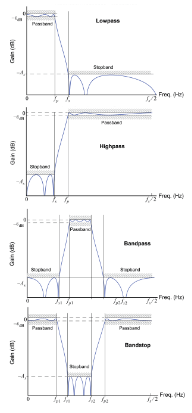

Gambar ini menampilkan empat jenis diagram respons frekuensi dari filter elektronik. Masing-masing diagram menunjukkan hubungan antara penguatan (Gain) dalam decibel (dB) dan frekuensi dalam Hertz (Hz) untuk berbagai jenis filter:

1. **Filter Lowpass (penyaring lolos rendah):**
   - Memiliki daerah lolos (passband) pada frekuensi rendah dan daerah jeda (stopband) pada frekuensi tinggi.
   - Frekuensi batas (cutoff frequency) ditandai sebagai \( f_c \).

2. **Filter Highpass (penyaring lolos tinggi):**
   - Memiliki daerah jeda pada frekuensi rendah dan daerah lolos pada frekuensi tinggi.
   - Frekuensi batas ditandai sebagai \( f_c \).

3. **Filter Bandpass (penyaring pita):**
   - Memiliki dua frekuensi batas, \( f_{c1} \) dan \( f_{c2} \), yang menentukan daerah lolos frekuensi tengah dan dua daerah jeda pada frekuensi rendah dan tinggi.
   - Daerah lolos terletak di antara \( f_{c1} \) dan \( f_{c2} \).

4. **Filter Bandstop (penyaring celah pita):**
   - Memiliki dua frekuensi batas, \( f_{c1} \) dan \( f_{c2} \), yang menentukan dua daerah lolos pada frekuensi rendah dan tinggi, dan daerah jeda di antara \( f_{c1} \) dan \( f_{c2} \).

Setiap diagram dilengkapi dengan kurva respons yang menunjukkan bagaimana filter merespons berbagai frekuensi, dengan menyesuaikan penguatan dalam dB tergantung pada frekuensi yang diberikan.


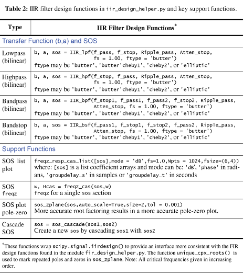

Gambar tersebut adalah tabel yang berjudul "Table 2: IIR filter design functions in `iir_design_helper.py` and key support functions." Tabel ini berisi beberapa kolom dengan berbagai jenis fungsi desain filter IIR yang dibagi menjadi beberapa kategori. Berikut adalah deskripsi kategori dan konten yang ada dalam tabel:

1. **Transfer Function (ba) and SOS**:
   - Terdiri dari beberapa sub-fungsi seperti ltiwrap (bilinear), highpass (bilinear), dan bandpass (bilinear).
   - Kolom pertama menjelaskan nama fungsi dan parameter-parameternya.
   - Kolom kedua menunjukkan contoh pemanggilan fungsi dan parameter yang digunakan.

2. **Support Functions**:
   - Terdiri dari beberapa sub-fungsi seperti replrast (sos), splitba (sos), dan others (ba).
   - Kolom pertama menjelaskan nama sub-fungsinya.
   - Kolom kedua memberikan ringkasan atau potongan kode dari fungsi tersebut.

3. **Type**:
   - Berisi tipe dari masing-masing fungsi desain filter IIR seperti "butter," "cheby1," "cheby2," "ellip," dsb.
   - Menjelaskan parameter `ftype` yang digunakan untuk berbagai tipe filter.

Fungsi-fungsi pada tabel ini membantu dalam mendesain filter IIR dengan cara menggunakan fungsi transfer serta menyediakan fungsionalitas pendukung lain yang relevan.


In [16]:
# Mendesain filter IIR low-pass dengan beberapa jenis filter (Butterworth, Chebyshev Type I,
# Chebyshev Type II, dan Elliptic) menggunakan fungsi IIR_lpf().
# Parameter-parameter yang diberikan adalah frekuensi passband (f_pass), frekuensi stopband (f_stop),
# ripple passband (0.5), jumlah taps (60), frekuensi sampling (fs), dan jenis filter ('butter', 'cheby1', 'cheby2', 'ellip').
fs = 48000
f_pass = 5000
f_stop = 8000
b_but, a_but, sos_but = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'butter')
b_cheb1, a_cheb1, sos_cheb1 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby1')
b_cheb2, a_cheb2, sos_cheb2 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby2')
b_elli, a_elli, sos_elli = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'ellip')

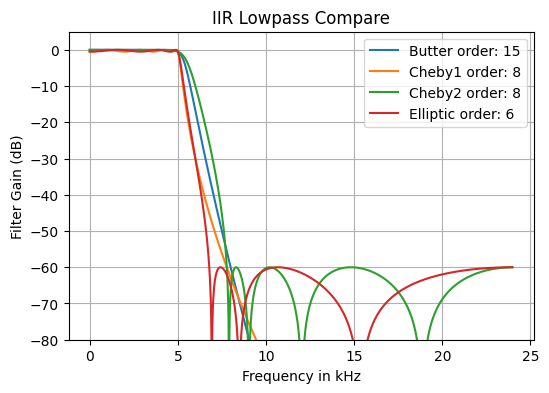

In [17]:
# Memplot respons frekuensi dari filter IIR low-pass dengan berbagai jenis filter
# menggunakan fungsi freqz_resp_cas_list() dari paket iir_d.
# Parameter-parameter yang diberikan adalah daftar second-order sections (sos) dari masing-masing jenis filter,
# tipe respons (dB untuk respons dalam dB), dan frekuensi sampling (48 kHz).
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'IIR Lowpass Compare')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan urutan filter dan jumlah order untuk setiap jenis filter
legend((r'Butter order: %d' % (len(a_but) - 1),
        r'Cheby1 order: %d' % (len(a_cheb1) - 1),
        r'Cheby2 order: %d' % (len(a_cheb2) - 1),
        r'Elliptic order: %d' % (len(a_elli) - 1)), loc='best')

# Menampilkan grid pada plot
grid()

Gambar tersebut menunjukkan perbandingan beberapa filter lowpass IIR berdasarkan respons frekuensi mereka. Terdapat empat jenis filter yang dibandingkan:

1. **Butterworth** dengan order 15 (ditampilkan dalam garis biru)
2. **Chebyshev Tipe 1** dengan order 8 (ditampilkan dalam garis oranye)
3. **Chebyshev Tipe 2** dengan order 8 (ditampilkan dalam garis hijau)
4. **Elliptic** dengan order 6 (ditampilkan dalam garis merah)

Sumbu horizontal menunjukkan frekuensi dalam kHz, sedangkan sumbu vertikal menunjukkan gain filter dalam dB. Grafik ini memberikan gambaran tentang seberapa kuat masing-masing filter mengurangi atau melemahkan sinyal pada berbagai frekuensi.

Berikut beberapa poin penting dari grafik tersebut:

- Filter Butterworth (garis biru) memiliki transisi yang lebih halus.
- Filter Chebyshev Tipe 1 (garis oranye) menunjukkan lebih banyak riak di bandpass tetapi memiliki cutoff yang tajam.
- Filter Chebyshev Tipe 2 (garis hijau) menunjukkan riak di bandstop.
- Filter Elliptic (garis merah) menunjukkan riak baik di bandpass maupun bandstop tetapi memiliki laju transisi paling tajam di antara keempatnya.

Grafik ini membantu dalam memahami bagaimana masing-masing filter menangani sinyal berdasarkan frekuensi yang berbeda.


(15, 15)

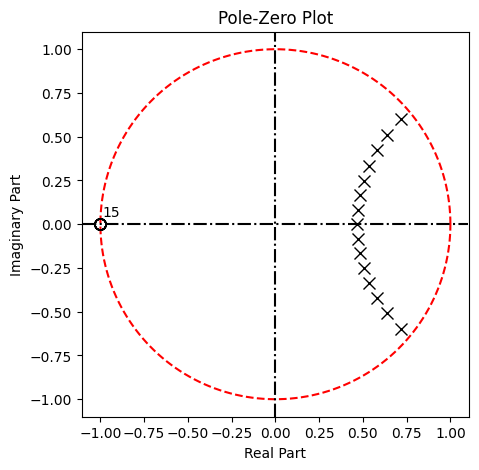

In [19]:
# Menampilkan konfigurasi pole-zero dari filter IIR menggunakan metode sos_zplane()
# dari paket iir_d. Parameter yang diberikan adalah second-order sections (sos) dari filter Butterworth.
iir_d.sos_zplane(sos_but)

Ini adalah plot pole-zero untuk sebuah sistem dinamis. Sumbu horizontal mewakili bagian real dan sumbu vertikal mewakili bagian imajiner. Ada dua jenis simbol pada plot ini:

1. **Lingkaran kecil kosong**: Ini menunjukkan posisi zero (nol) dari sistem.
2. **Simbol silang hitam**: Ini menunjukkan posisi pole (kutub) dari sistem.

Terdapat batas lingkaran dengan garis merah putus-putus yang berpusat di titik (0,0). Lingkaran ini berfungsi sebagai batas kestabilan sistem, di mana kutub di luar lingkaran ini akan menunjukkan sistem yang tidak stabil.

Bidang ini dibagi dengan dua garis putus-putus hitam yang saling tegak lurus dan melalui titik asal (0,0), satu pada sumbu real dan satu pada sumbu imajiner.

Di plot ini, terlihat bahwa zero berada pada titik (-1.0, 0) dan pole-pole tersebar di sekitar area real positif.


In [20]:
# Mendesain filter IIR low-pass menggunakan metode Elliptic
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1950 dan 2050),
# normalized band edges (0.5), jumlah taps (80), frekuensi sampling (8000 Hz), dan jenis filter ('ellip').
b_lp, a_lp, sos_lp = iir_d.IIR_lpf(1950, 2050, 0.5, 80, 8000., 'ellip')

# Membuat filter IIR dengan metode multirate menggunakan fungsi multirate_IIR()
mr_lp = mrh.multirate_IIR(sos_lp)

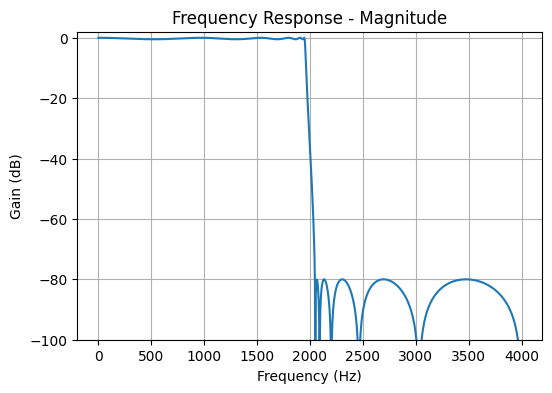

In [21]:
# Menghitung respons frekuensi dari filter IIR menggunakan metode multirate
# Parameter-parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (8000 Hz).
mr_lp.freq_resp('db', 8000)

Gambar ini menunjukkan grafik respons frekuensi dalam domain magnitude. Grafik ini memiliki sumbu horizontal yang menunjukkan frekuensi dalam Hertz (Hz) mulai dari 0 sampai 4000 Hz. Sumbu vertikal menunjukkan gain dalam desibel (dB) dari -100 dB hingga 0 dB.

Grafik ini memiliki karakteristik low-pass filter yang berarti hanya frekuensi rendah yang dapat lewat dan frekuensi tinggi di atas sekitar 2000 Hz sangat berkurang atau ditolak. Kita dapat melihat bahwa pada frekuensi di bawah 2000 Hz, gain berada di sekitar 0 dB menunjukkan bahwa sinyal melewati filter hampir tanpa reduksi. Namun, setelah melewati sekitar 2000 Hz, gain turun tajam mendekati -100 dB, menunjukkan bahwa sinyal sangat berkurang atau hampir seluruhnya ditolak pada frekuensi-frekuensi tersebut.

Terdapat juga beberapa osilasi kecil pada frekuensi tinggi di atas 2000 Hz, namun tetap berada pada nilai gain yang rendah.


(-130.0, -30.0)

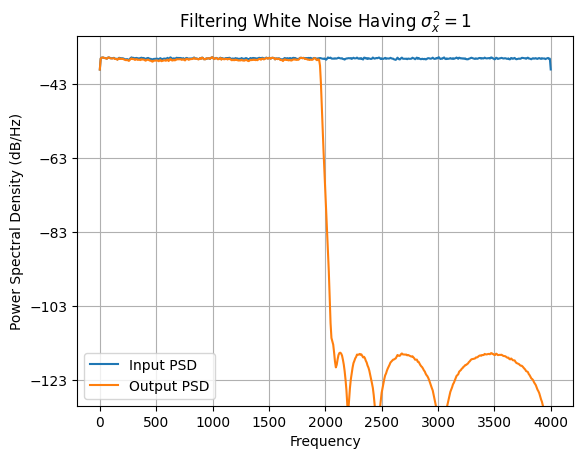

In [22]:
# Menghasilkan 1 juta sampel data acak menggunakan fungsi randn()
x = randn(1000000)

# Memfilter data menggunakan filter multirate yang telah dibuat
y = mr_lp.filter(x)

# Menghitung dan memplot spektrum daya menggunakan fungsi psd()
# Parameter yang diberikan adalah data (x dan y), jumlah sampel FFT (2^10), dan frekuensi sampling (8000 Hz).
psd(x, 2**10, 8000)
psd(y, 2**10, 8000)

# Menambahkan judul pada plot
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')

# Menambahkan legenda dengan label 'Input PSD' dan 'Output PSD' pada lokasi terbaik
legend(('Input PSD', 'Output PSD'), loc='best')

# Mengatur batas sumbu y dari -130 hingga -30
ylim([-130, -30])

Gambar ini adalah plot spektral daya (PSD) yang menunjukkan hasil penyaringan suara putih dengan varians σ_x^2 = 1. Sumbu horizontal (x) mewakili frekuensi dalam satuan yang tidak disebutkan, sedangkan sumbu vertikal (y) mewakili kepadatan daya spektral (PSD) dalam dB/Hz.

Garis berwarna biru menunjukkan PSD untuk input (Input PSD) yang tetap konstan mendekati -43 dB/Hz untuk keseluruhan rentang frekuensi, menunjukkan bahwa input merupakan suara putih dengan spektrum datar.

Garis berwarna oranye menunjukkan PSD untuk output (Output PSD) setelah proses penyaringan. Di lihat dari grafik, penyaringan ini jelas mengurangi komponen frekuensi yang berada antara kira-kira 1900 hingga 2100 Hz, menurunkan PSD menjadi sekitar -123 dB/Hz di rentang tersebut. Frekuensi diluar range tersebut mempertahankan nilai yang mendekati input PSD.

Judul grafik adalah "Filtering White Noise Having σ_x^2 = 1". Grid pada grafik juga membantu dalam membaca nilai frekuensi dan PSD dengan lebih tepat.


In [23]:
# Menentukan frekuensi sampling
fs = 8000

# Menghitung dan mencetak PSD yang diharapkan dalam satuan dB/Hz menggunakan rumus 10*log10(fs)
print('Expected PSD of %2.3f dB/Hz' % (0 - 10 * log10(fs),))

Expected PSD of -39.031 dB/Hz


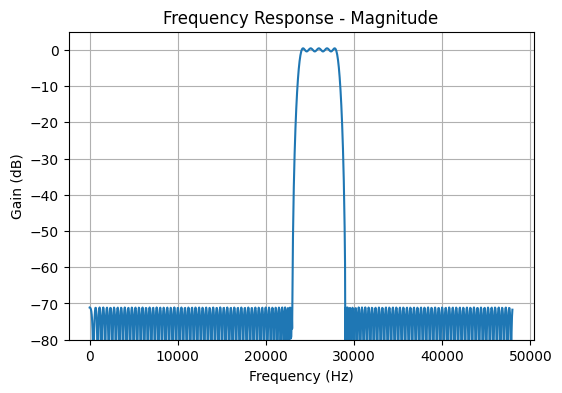

In [24]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();

Gambar ini adalah grafik respons frekuensi - magnitudo yang menampilkan hubungan antara frekuensi (dalam Hertz) dan gain (dalam desibel). Sumbu horizontal mewakili frekuensi dari 0 hingga 50.000 Hz, sedangkan sumbu vertikal menunjukkan gain, berkisar dari -80 dB sampai 10 dB.

Grafik menunjukkan bahwa gain berada di sekitar 0 dB antara frekuensi 20.000 Hz dan 30.000 Hz, yang menandakan bahwa frekuensi-frekuensi ini ditransmisikan tanpa banyak atenuasi. Di luar rentang frekuensi ini, gain turun drastis hingga sekitar -80 dB, menunjukkan bahwa frekuensi-frekuensi ini sangat teredam. Grafik ini menggambarkan karakteristik filter band-pass yang hanya memungkinkan frekuensi-frekuensi dalam rentang tertentu (sekitar 20.000 Hz hingga 30.000 Hz) untuk lolos melalui filter tanpa banyak kehilangan energi.


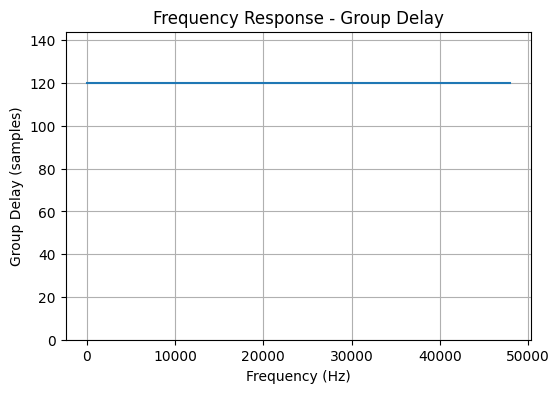

In [25]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Grafik ini menunjukkan Respons Frekuensi - Tunda Grup (Frequency Response - Group Delay). Sumbu horizontal (x) merepresentasikan Frekuensi (Hz), yang berkisar dari 0 hingga 50.000 Hz. Sumbu vertikal (y) menunjukkan Tunda Grup (samples), dengan nilai dari 0 hingga 140.

Dalam grafik ini, terlihat bahwa Tunda Grup (Group Delay) adalah konstan pada sekitar 120 samples di seluruh rentang frekuensi yang ditampilkan. Garis horizontal datar mengindikasikan bahwa tunda grup tidak berubah dengan frekuensi.


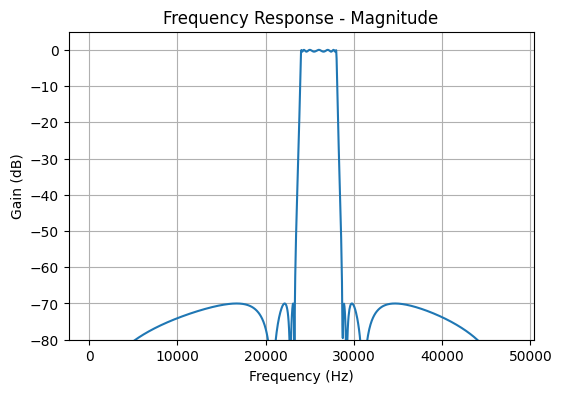

In [26]:
# Merancang filter band-pass menggunakan metode IIR elliptic
b_rec_bpf2, a_rec_bpf2, sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                     0.5,70,96000,'ellip')

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
with np.errstate(divide='ignore'):  # Mengabaikan pembagian dengan nol yang mungkin terjadi
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();


Pada gambar ini ditampilkan sebuah plot respons frekuensi dalam domain magnitudo. Berikut adalah beberapa elemen penting yang perlu diperhatikan:

1. **Judul Grafik**: Grafik ini berjudul "Frequency Response - Magnitude," yang berarti respons frekuensi dari sistem ditampilkan dalam bentuk magnitudo atau gain.

2. **Sumbu X**: Sumbu horizontal (sumbu x) mewakili frekuensi dalam Hertz (Hz). Rentang frekuensi yang ditampilkan adalah dari 0 Hz hingga 50,000 Hz.

3. **Sumbu Y**: Sumbu vertikal (sumbu y) mewakili gain dalam desibel (dB). Rentangnya berkisar dari -80 dB hingga 0 dB.

4. **Respons Frekuensi**: Kurva pada grafik menunjukkan bagaimana gain sistem berubah seiring dengan frekuensi. Dari kurva tersebut, kita dapat melihat bahwa:
   - Ada jendela frekuensi tertentu di sekitar 30,000 Hz di mana gain mencapai nilai maksimum (sekitar 0 dB).
   - Di luar jendela frekuensi tersebut, gain menurun secara signifikan, mencapai nilai -80 dB pada beberapa frekuensi.

5. **Bandpass Filter Indikasi**: Bentuk plot yang memperlihatkan puncak gain pada beberapa frekuensi dan respon yang menurun secara drastis di luar jendela frekuensi tersebut mengindikasikan bahwa sistem ini kemungkinan adalah sebuah filter bandpass. Filter ini melewatkan frekuensi dalam rentang tertentu dengan gain yang tinggi (sekitar 30,000 Hz) dan menekan frekuensi di luar rentang tersebut.

Filter bandpass seperti ini sering digunakan dalam aplikasi komunikasi atau pengolahan sinyal digital untuk mengisolasi frekuensi yang diinginkan dari sinyal input.


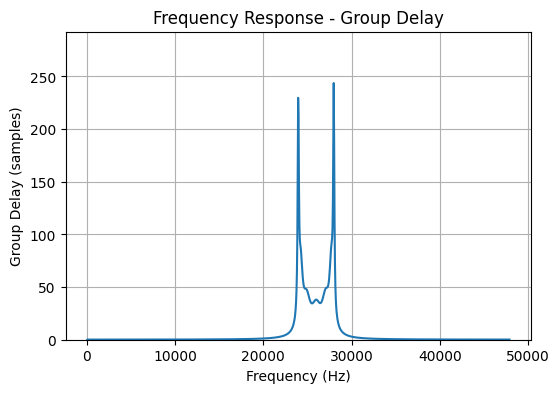

In [27]:
# Mengatur penanganan peringatan ketika terjadi pembagian dengan nol atau nilai yang tidak valid
with np.errstate(divide='ignore', invalid='ignore'):
    # Memplot respons frekuensi filter dalam bentuk delay kelompok (group delay)
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Gambar yang Anda berikan adalah grafik yang menunjukkan respons frekuensi dalam bentuk keterlambatan kelompok (group delay).

Berikut adalah penjelasan elemen-elemen pada grafik ini:

1. **Judul Grafik**: "Frequency Response - Group Delay" yang mengindikasikan bahwa grafik ini menunjukkan keterlambatan kelompok terhadap frekuensi.

2. **Sumbu X (Horizontal)**: Diberi label "Frequency (Hz)", yang menunjukkan frekuensi dalam satuan Hertz (Hz). Rentang frekuensinya adalah dari 0 hingga 50,000 Hz.

3. **Sumbu Y (Vertikal)**: Diberi label "Group Delay (samples)", yang menunjukkan keterlambatan kelompok dalam satuan sampel.

4. **Kurva atau Garis pada Grafik**: Garis ini mewakili keterlambatan kelompok sebagai fungsi dari frekuensi. Dari grafik, terlihat bahwa ada dua puncak yang signifikan pada sekitar frekuensi 25,000 Hz. Ini menunjukkan peningkatan keterlambatan kelompok pada frekuensi sekitar ini.

5. **Puncak (Peaks)**: Puncak pada sekitar 25,000 Hz menunjukkan di mana terjadi peningkatan keterlambatan kelompok yang signifikan.

**Interpretasi Umum:**

- **Keterlambatan Kelompok**: Keterlambatan kelompok adalah ukuran berapa banyak waktu satu kelompok frekuensi tertentu tertunda ketika melewati sistem. Ini sangat penting dalam desain filter dan sistem komunikasi karena keterlambatan kelompok yang besar dapat menyebabkan distorsi dalam sinyal yang diproses.
- **Puncak Keterlambatan Kelompok**: Di grafik ini, puncak keterlambatan kelompok di sekitar 25,000 Hz menunjukkan bahwa pada frekuensi ini sinyal mengalami keterlambatan yang relatif besar, yang bisa menunjukkan karakteristik filter atau sistem yang menyebabkan ketidakseimbangan waktu pada frekuensi tersebut.

Jika Anda memiliki pertanyaan lebih spesifik terkait grafik ini, silakan diinformasikan!
